<IPython.core.display.Javascript object>


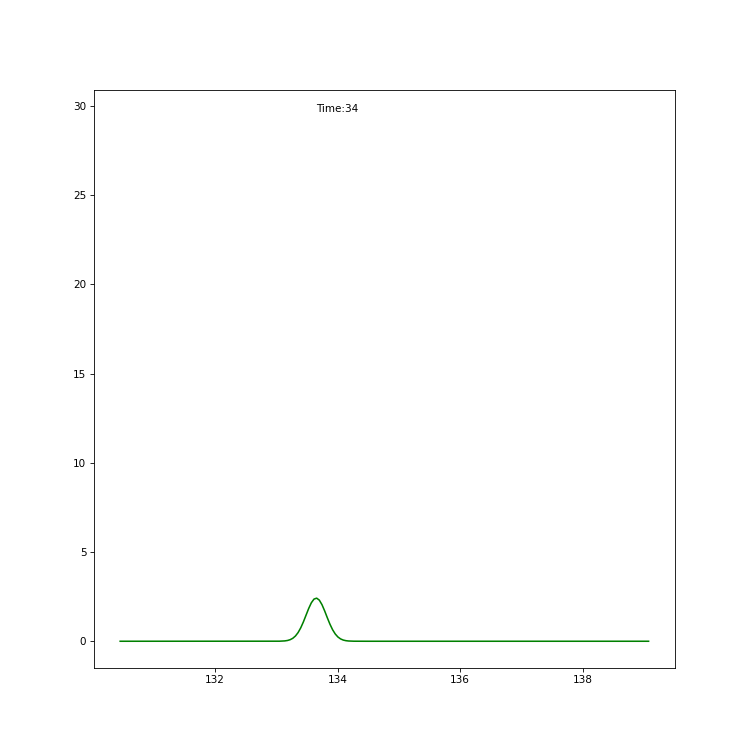

32671
0.0 %
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.000000000000001 %
7.000000000000001 %
8.0 %
9.0 %
10.0 %
10.999999999999998 %
11.999999999999998 %
12.999999999999998 %
13.999999999999998 %
15.0 %
16.0 %
17.0 %
18.000000000000004 %
19.000000000000004 %
20.000000000000004 %
21.000000000000004 %
22.000000000000007 %
23.000000000000007 %
24.000000000000007 %
25.000000000000007 %
26.000000000000007 %
27.000000000000007 %
28.000000000000007 %
29.00000000000001 %
30.00000000000001 %
31.00000000000001 %
32.000000000000014 %
33.000000000000014 %
34.000000000000014 %
35.000000000000014 %
36.000000000000014 %
37.000000000000014 %
38.000000000000014 %
39.00000000000002 %
40.00000000000002 %
41.00000000000002 %
42.00000000000002 %
43.00000000000002 %
44.00000000000002 %
45.00000000000002 %
46.00000000000002 %
47.00000000000003 %
48.00000000000003 %
49.00000000000003 %
50.00000000000002 %
51.00000000000002 %
52.00000000000002 %
53.00000000000003 %
54.00000000000003 %
55.00000000000003 %
56.0000000000000

In [6]:
%matplotlib nbagg
#https://qiita.com/Tatejimaru137/items/6083e2e3a4e618da6274
#https://teratail.com/questions/171819
#https://haizairenmei.com/2021/04/08/matplotlib-animation-text/

import csv
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math
import time

csv_file= open("./USDJPY_2022_08.csv", "r", encoding="ms932", errors="", newline="" )
#リスト形式
f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)

BOOLg=True

cnt=0
day=[]
data1=[]
data2=[]
data3=[]
data4=[]
for row in f:
    #rowはList
    #row[0]で必要な項目を取得することができる
    day.append(float(row[2]))
    data1.append(float(row[2]))
    data2.append(float(row[3]))
    data3.append(float(row[4]))
    data4.append(float(row[5]))

fig, ax = plt.subplots(figsize=(10,10),dpi=50)

artists = []
print(len(data1))
#print(data4)
ims=[]
numframes=294
#numframes=10
r=3
percent=0.00
mean=[]
sig=[]
T=range(numframes)
for i in range(numframes):
    if i/numframes>percent:
        print(percent*100,'%')
        percent+=0.01
    h=[]
    for j in range(37*r):
        h.append(data1[i*37*r+j])
        h.append(data2[i*37*r+j])
        h.append(data3[i*37*r+j])
        h.append(data4[i*37*r+j])
    if BOOLg:
        param = norm.fit(h)
        x = np.linspace(130.449,139.077,200)
        pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])
        mean.append(param[0])
        sig.append(param[0])
        pdf = norm.pdf(x)
        im=plt.plot(x, pdf_fitted, color='green')
        tx = plt.text(134, 30.1, 'Time:'+str(i),ha='center',va='top')
        artists.append(im+[tx])
#    n, bins, artist = plt.hist(h,range=(130.449,139.036),bins=340,density=True)
    else:
        n, bins, artist = plt.hist(h,range=(130.449,139.077),bins=160,density=True)
        tx = plt.text(134, 16.1, 'Time:'+str(i),ha='center',va='top')
        artists.append(im+[tx])
    

ani = animation.ArtistAnimation(fig, artists, interval=100)
ani.save("gaussianTimeEvolution.gif", writer="pillow")
plt.show()